# Trabajo Práctico 2

In [312]:
 # To use the venv as jupyter kernel
 # python -m ipykernel install --user --name tp2 --display-name "Python (tp2)"

In [313]:
import itertools
import sys
sys.path.append('src/')

In [314]:
import importlib
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import tp2
from tp2.perceptron import ThresholdUnit, NonLinearUnit
from tp2.multilayer import MultilayerNetwork, MultilayerTrainer
import tp2.aux as tp2Aux
import pickle

In [315]:
importlib.reload(tp2.perceptron)
importlib.reload(tp2.multilayer)
importlib.reload(tp2Aux)

<module 'tp2.aux' from '/home/jzuloaga/RedesNeuronales/TP2/tp2/src/tp2/aux.py'>

In [316]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

### 1. Implemente un perceptrón simple que aprenda la función lógica AND de 2 y de 4 entradas. Lo mismo para la función lógica OR. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

#### AND de dos entradas

Tabla de entradas / salidas

In [317]:
and_truth_table = [
        ((1, 1), [1]),
        ((1, -1), [-1]),
        ((-1, 1), [-1]),
        ((-1, -1), [-1])
    ]

tp2Aux.train_data_to_df(and_truth_table)

y
x1 x2    
 1  1   1
   -1  -1
-1  1  -1
   -1  -1

Pesos tras el entrenamiento. El 0 corresponde al bias, modelado como una entrada constante $x_0 = -1$

In [318]:
tu_and=ThresholdUnit()
tu_and.train(and_truth_table)
tp2Aux.weights_to_df(tu_and)

,w
x,
0,0.04
1,1.00
2,1.00


La ecuación de la recta de decisión es $-w_0 + x_1 w_1 + x2_2 = 0$

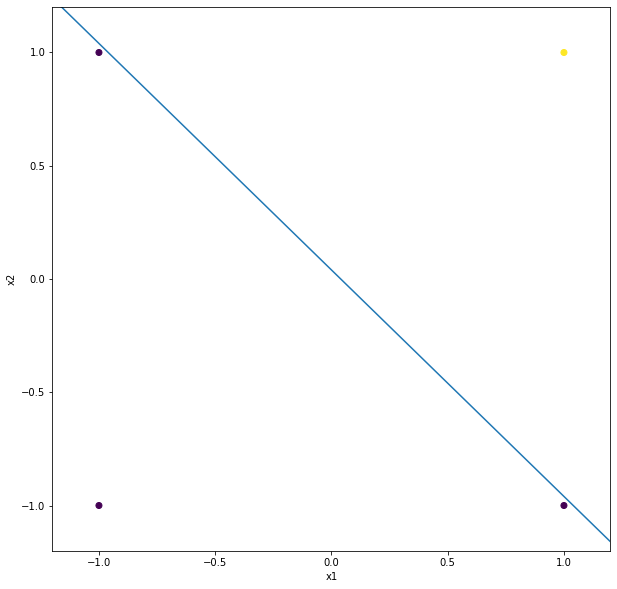

In [319]:
tp2Aux.plot_2d_tu(tu_and)

#### OR de dos entradas

Tabla de entradas / salidas

In [320]:
or_truth_table = [
        ((1, 1), [1]),
        ((1, -1), [1]),
        ((-1, 1), [1]),
        ((-1, -1), [-1])
    ]

tp2Aux.train_data_to_df(or_truth_table)

y
x1 x2    
 1  1   1
   -1   1
-1  1   1
   -1  -1

Pesos tras el entrenamiento. El 0 corresponde al bias, modelado como una entrada constante $x_0 = -1$

In [321]:
tu_or=ThresholdUnit()
tu_or.train(or_truth_table)
tp2Aux.weights_to_df(tu_or)

,w
x,
0,0.0
1,1.0
2,1.0


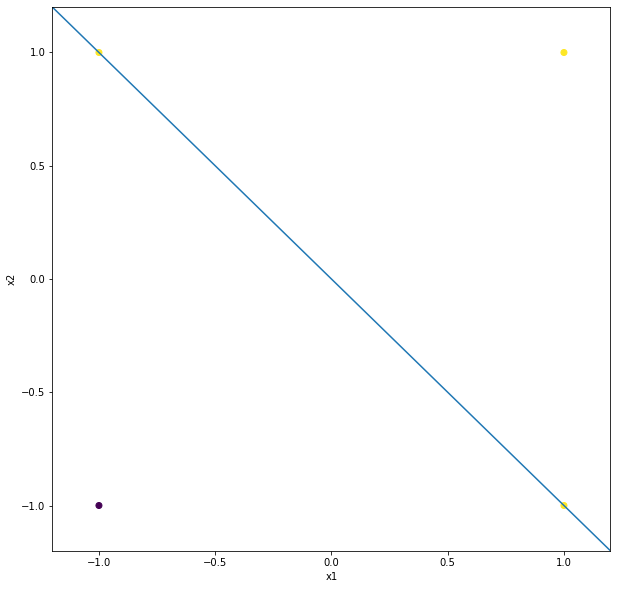

In [322]:
tp2Aux.plot_2d_tu(tu_or)

#### AND de 4 entradas

Tabla de entradas / salidas

In [323]:
and4_truth_table = [
    (( 1,  1,  1,  1), [ 1]),
    (( 1,  1,  1, -1), [-1]),
    (( 1,  1, -1,  1), [-1]),
    (( 1,  1, -1, -1), [-1]),
    (( 1, -1,  1,  1), [-1]),
    (( 1, -1,  1, -1), [-1]),
    (( 1, -1, -1,  1), [-1]),
    (( 1, -1, -1, -1), [-1]),
    ((-1,  1,  1,  1), [-1]),
    ((-1,  1,  1, -1), [-1]),
    ((-1,  1, -1,  1), [-1]),
    ((-1,  1, -1, -1), [-1]),
    ((-1, -1,  1,  1), [-1]),
    ((-1, -1,  1, -1), [-1]),
    ((-1, -1, -1,  1), [-1]),
    ((-1, -1, -1, -1), [-1]),
        
    ]

tp2Aux.train_data_to_df(and4_truth_table)

y
x1 x2 x3 x4    
 1  1  1  1   1
         -1  -1
      -1  1  -1
         -1  -1
   -1  1  1  -1
         -1  -1
      -1  1  -1
         -1  -1
-1  1  1  1  -1
         -1  -1
      -1  1  -1
         -1  -1
   -1  1  1  -1
         -1  -1
      -1  1  -1
         -1  -1

Pesos tras el entrenamiento. El 0 corresponde al bias, modelado como una entrada constante $x_0 = -1$

In [324]:
tu_and4=ThresholdUnit()
tu_and4.train(and4_truth_table)
tp2Aux.weights_to_df(tu_and4)

,w
x,
0,1.04
1,0.48
2,0.48
3,0.48
4,0.48


#### OR de 4 entradas

In [325]:
or4_truth_table = [
    (( 1,  1,  1,  1), [ 1]),
    (( 1,  1,  1, -1), [ 1]),
    (( 1,  1, -1,  1), [ 1]),
    (( 1,  1, -1, -1), [ 1]),
    (( 1, -1,  1,  1), [ 1]),
    (( 1, -1,  1, -1), [ 1]),
    (( 1, -1, -1,  1), [ 1]),
    (( 1, -1, -1, -1), [ 1]),
    ((-1,  1,  1,  1), [ 1]),
    ((-1,  1,  1, -1), [ 1]),
    ((-1,  1, -1,  1), [ 1]),
    ((-1,  1, -1, -1), [ 1]),
    ((-1, -1,  1,  1), [ 1]),
    ((-1, -1,  1, -1), [ 1]),
    ((-1, -1, -1,  1), [ 1]),
    ((-1, -1, -1, -1), [-1]),
    ]

tp2Aux.train_data_to_df(or4_truth_table)

y
x1 x2 x3 x4    
 1  1  1  1   1
         -1   1
      -1  1   1
         -1   1
   -1  1  1   1
         -1   1
      -1  1   1
         -1   1
-1  1  1  1   1
         -1   1
      -1  1   1
         -1   1
   -1  1  1   1
         -1   1
      -1  1   1
         -1  -1

In [326]:
tu_or4=ThresholdUnit()
tu_or4.train(or4_truth_table)
tp2Aux.weights_to_df(tu_or4)

,w
x,
0,-1.04
1,0.48
2,0.52
3,0.52
4,0.48


### 2. Determine numéricamente cómo varia la capacidad del perceptrón simple en función del número de patrones enseñados.

Se configuró una Threshold Unit (perceptron que utiliza la función signo) con $N = [1 .. 10]$ entradas.

Para cada configuración, y se entrena con K pares de entrada/salida  $(\mathbf{x}, y )$ aleatorios.

$\mathbf{x}$ es un vector de $N$ entradas aleatorias de distribución $U_{-1,1}$, $y$ una Bernoulli ${[-1,1]}$ con $P(\frac{1}{2})$

Mediante método de Montecarlo se estima la tasa de éxito de un entrenamiento de $K$ muestras aleatorias en un perceptrón de $N$ entradas, comenzando con $K=1$. El experimento se repite hasta obtener estimadores de la tasa de éxito con un error de $\pm 0.02$ en un intervalo de confianza del $95\%$

Para el caso de $N=1$ el método se validó contra el análisis analítico de la tasa de éxito. Se encontró que para 1000 de iteraciones y velocidad de convergencia $\eta=0.01$ seleccionados, el entrenamiento no encontraba solución a casos linealmente separables. Aún así se determinó que esos errores no modificaban considerablemente la salida del Montecarlo.

Text(0.5, 1.0, 'Capacidad de una Threshold Unit')

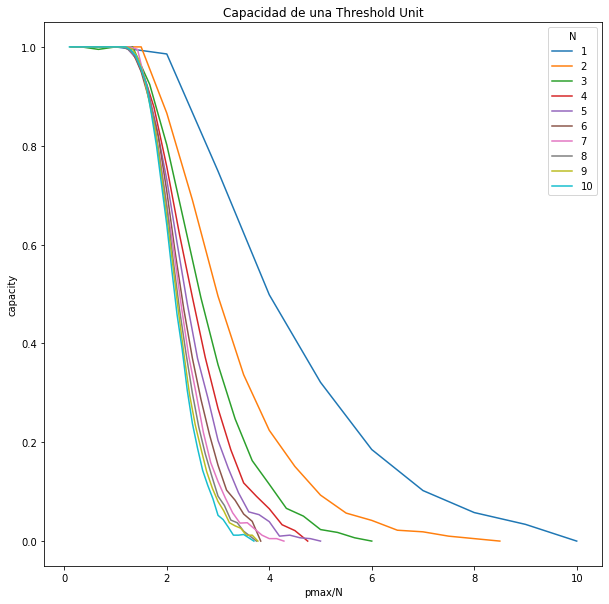

In [327]:
dfCap=pd.read_csv("data/capacity.csv", usecols= lambda x: x in ["dim", "pmax", "cap"]).sort_values(["dim", "pmax"])

for dim,dim_cap in dfCap.groupby("dim"):
    plt.plot( dim_cap["pmax"]/dim_cap["dim"], dim_cap["cap"], label=int(dim))

plt.xlabel("pmax/N")
plt.ylabel("capacity")
plt.legend(title="N")
plt.title("Capacidad de una Threshold Unit")

Se observa que el ThresholdUnit tiene capacidad cercana a 1 para $\frac{\mathrm{pmax}}{N} \lt 1.5$

### 3. a) Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de 4 entradas (utilizando el algoritmo Backpropagation).

Se comienza reimplementando el perceptrón simple utilizando Non Linear Units con $tanh$ como función de activación.
Se optimizan los pesos aplicando gradiente descendente sobre la función consto $C$

$C = \sum_k ( \zeta_k - g(\mathbf{w}^\mathrm{T} \cdot \mathbf{x_k}) )^2$

$\nabla C = \sum_k 2 ( \zeta_k - g(\mathbf{w}^\mathrm{T} \cdot \mathbf{x_k}))  g'(\mathbf{w}^\mathrm{T} \cdot \mathbf{x_k}) \mathbf{x_k}$

Se ensaya el correcto funcionamiento de la Non Linear Unit aprendiendo la función OR

In [328]:
nlu_or=NonLinearUnit()
nlu_or.train(or_truth_table)
tp2Aux.train_data_to_df([ (x,nlu_or.process(x)) for x,y in or_truth_table])

Best Cost: 0


y
x1 x2          
 1  1  0.999986
   -1  0.962131
-1  1  0.962131
   -1 -0.962131

Se implementa una red multi capa en base a las non linear units. Los pesos se inicializan de manera aleatoria y se optimizan mediante gradiente descendiente y back-propagation. El algoritmo se detiene cuando no detecta mejoras significativas en la función costo.
En caso de converger a un mínimo local, se reinicializa el algoritmo en otro punto.

#### Función XOR de 2 compuertas

In [329]:
xor_gate_table = [
    ((1, 1), (-1,)),
    ((1, -1), (1,)),
    ((-1, 1), (1,)),
    ((-1, -1), (-1,))
]

tp2Aux.train_data_to_df(xor_gate_table)

y
x1 x2    
 1  1  -1
   -1   1
-1  1   1
   -1  -1

In [330]:
mn_xor2=MultilayerNetwork([2,2,1])
trainer_xor2 = MultilayerTrainer(mn_xor2,xor_gate_table)
xor2_costs=[]
trainer_xor2.cost_callback = lambda x: xor2_costs.append(x)
trainer_xor2.train()
tp2Aux.train_data_to_df([ (x,mn_xor2.process(x)) for x,y in xor_gate_table])

y
x1 x2          
 1  1 -0.971612
   -1  0.960945
-1  1  0.961634
   -1 -0.971672

#### Función XOR de 4 compuertas

In [331]:
large_xor_gate_table = [
    (( 1,  1,  1,  1), (-1,)),
    (( 1,  1,  1, -1), (-1,)),
    (( 1,  1, -1,  1), (-1,)),
    (( 1,  1, -1, -1), (-1,)),
    (( 1, -1,  1,  1), (-1,)),
    (( 1, -1,  1, -1), (-1,)),
    (( 1, -1, -1,  1), (-1,)),
    (( 1, -1, -1, -1), ( 1,)),
    ((-1,  1,  1,  1), (-1,)),
    ((-1,  1,  1, -1), (-1,)),
    ((-1,  1, -1,  1), (-1,)),
    ((-1,  1, -1, -1), ( 1,)),
    ((-1, -1,  1,  1), (-1,)),
    ((-1, -1,  1, -1), ( 1,)),
    ((-1, -1, -1,  1), ( 1,)),
    ((-1, -1, -1, -1), (-1,)),
]

tp2Aux.train_data_to_df(large_xor_gate_table)

y
x1 x2 x3 x4    
 1  1  1  1  -1
         -1  -1
      -1  1  -1
         -1  -1
   -1  1  1  -1
         -1  -1
      -1  1  -1
         -1   1
-1  1  1  1  -1
         -1  -1
      -1  1  -1
         -1   1
   -1  1  1  -1
         -1   1
      -1  1   1
         -1  -1

In [332]:
nn_xor4=MultilayerNetwork([4,2,1])
trainer_xor4 = MultilayerTrainer(nn_xor4,large_xor_gate_table)
xor4_costs=[]
trainer_xor4.cost_callback = lambda x: xor4_costs.append(x)
trainer_xor4.train()
tp2Aux.train_data_to_df([ (x,nn_xor4.process(x)) for x,y in large_xor_gate_table])

y
x1 x2 x3 x4          
 1  1  1  1 -0.993135
         -1  -0.99314
      -1  1  -0.99314
         -1 -0.986225
   -1  1  1  -0.99314
         -1 -0.986225
      -1  1 -0.986225
         -1  0.978501
-1  1  1  1  -0.99314
         -1 -0.986225
      -1  1 -0.986225
         -1  0.978501
   -1  1  1 -0.986225
         -1  0.978501
      -1  1  0.978501
         -1 -0.957356

### 3. b) Muestre cómo evoluciona el error durante el entrenamiento.

Text(0.5, 1.0, '2 gates xor')

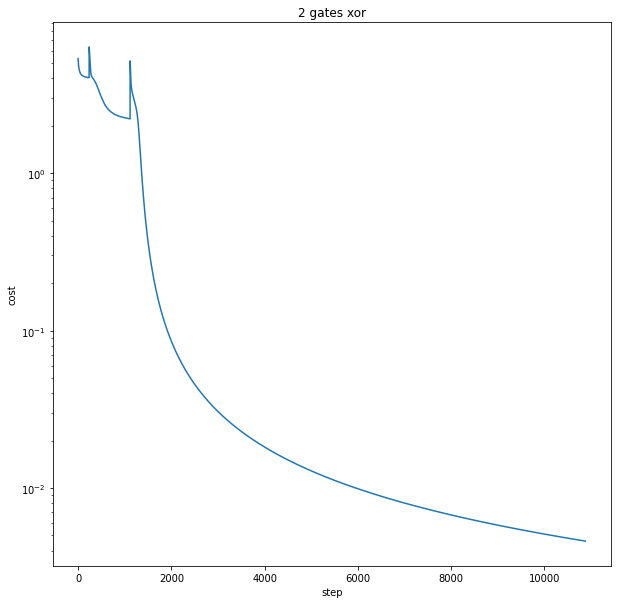

In [333]:
plt.plot(xor2_costs)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("cost")
plt.title("2 gates xor")

Text(0.5, 1.0, '4 gates xor')

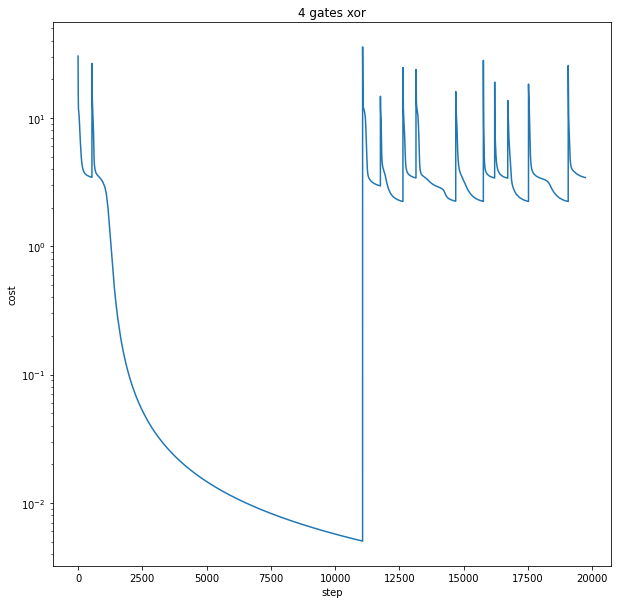

In [334]:
plt.plot(xor4_costs)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("cost")
plt.title("4 gates xor")

En la evolución del costo para la xor de 4 entradas se observa que el costo se estanca en mínimos locales y es necesario reiniciar el algoritmo.
La búsqueda del mínimo se facilita si se expande de 2 a 5 neuronas la capa oculta.

In [335]:
mn_xor4_h5=MultilayerNetwork([4,5,1])
trainer_xor4_h5 = MultilayerTrainer(mn_xor4_h5,large_xor_gate_table)
xor4_costs_h5=[]
trainer_xor4_h5.cost_callback = lambda x: xor4_costs_h5.append(x)
trainer_xor4_h5.train()

Text(0.5, 1.0, '4 gates xor')

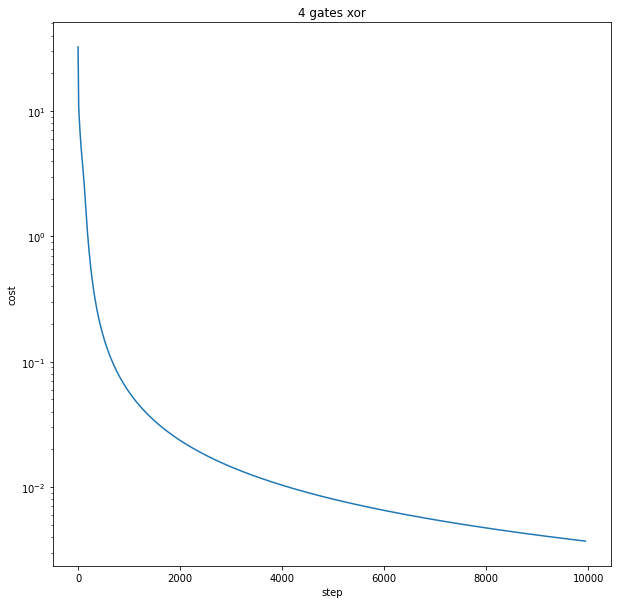

In [336]:
plt.plot(xor4_costs_h5)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("cost")
plt.title("4 gates xor")

### 3. c) Para una red entrenada en la función XOR de dos entradas, grafique el error en función de dos pesos cualesquiera de la red. De ejemplos de mínimos locales y mesetas.

/home/jzuloaga/RedesNeuronales/TP2/tp2/src/tp2/aux.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


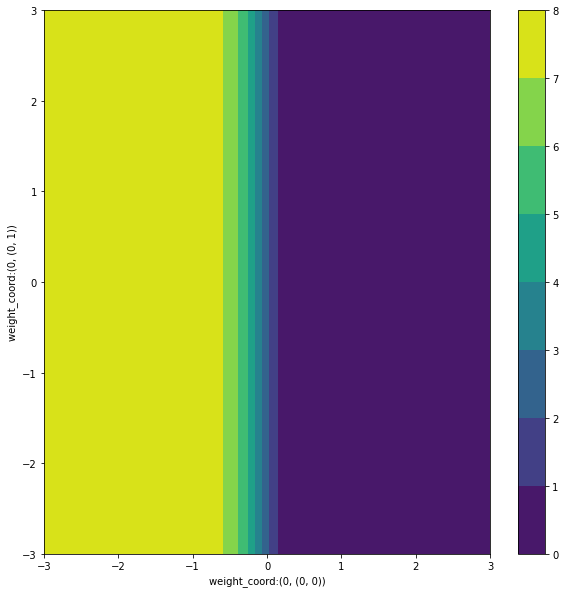

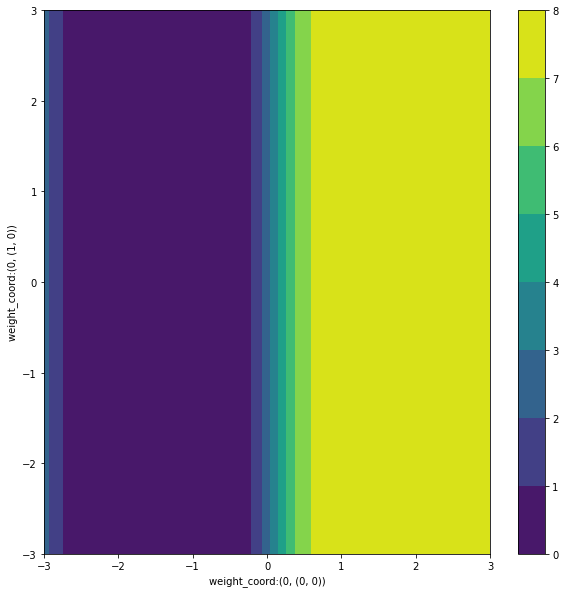

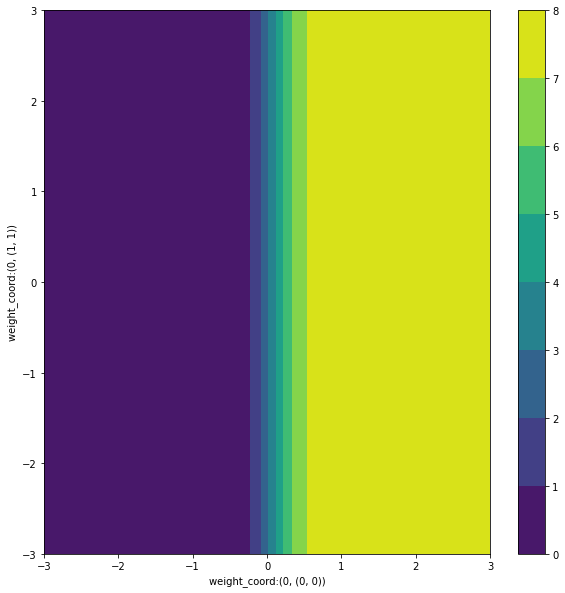

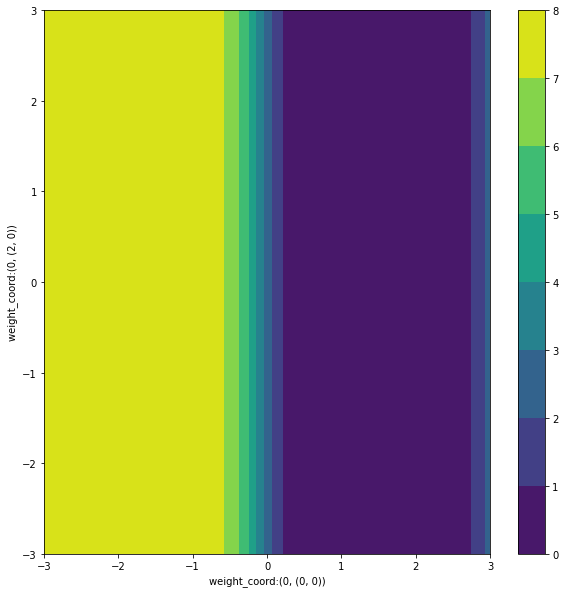

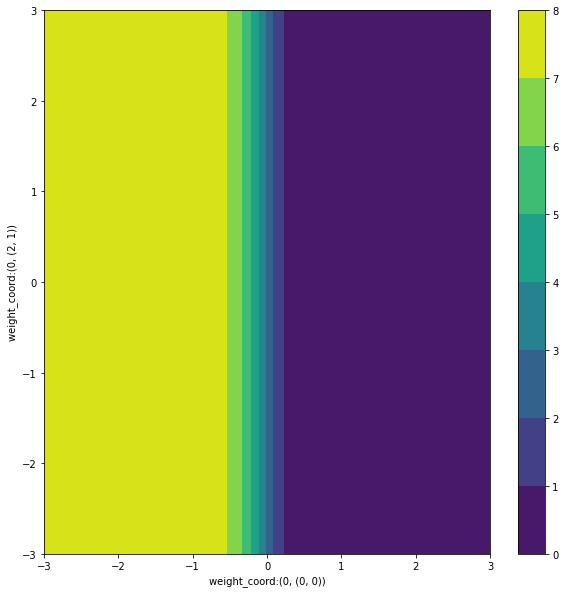

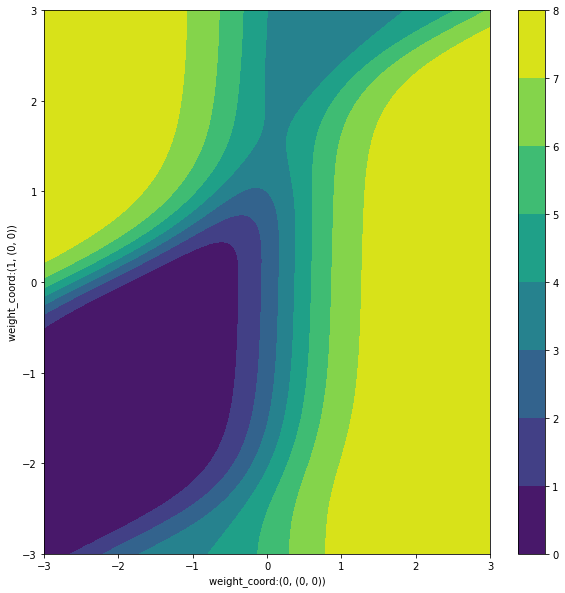

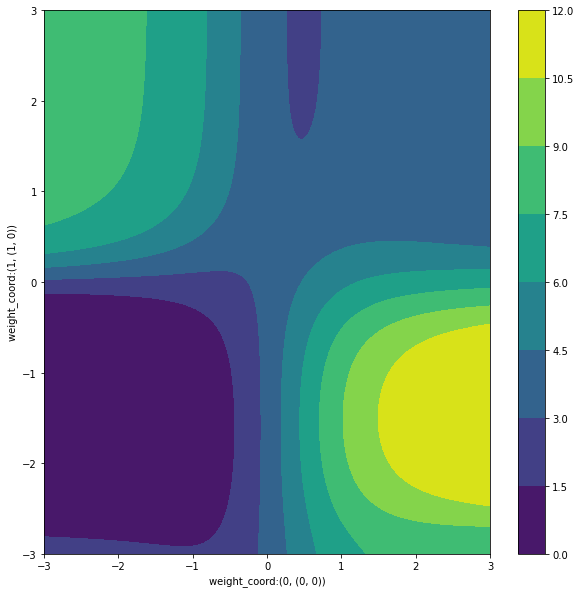

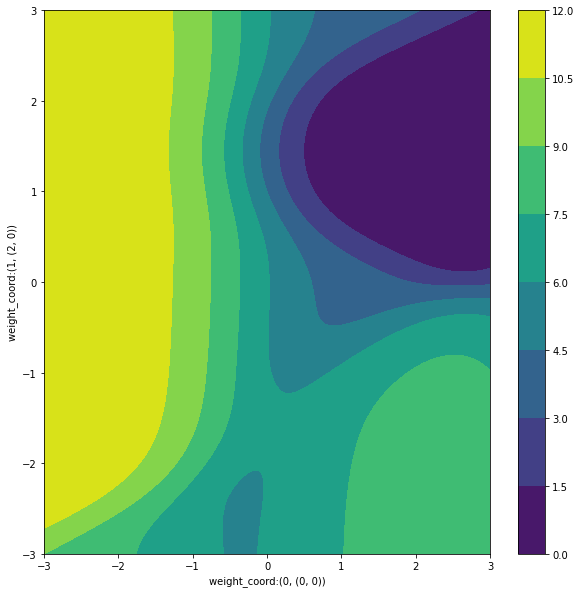

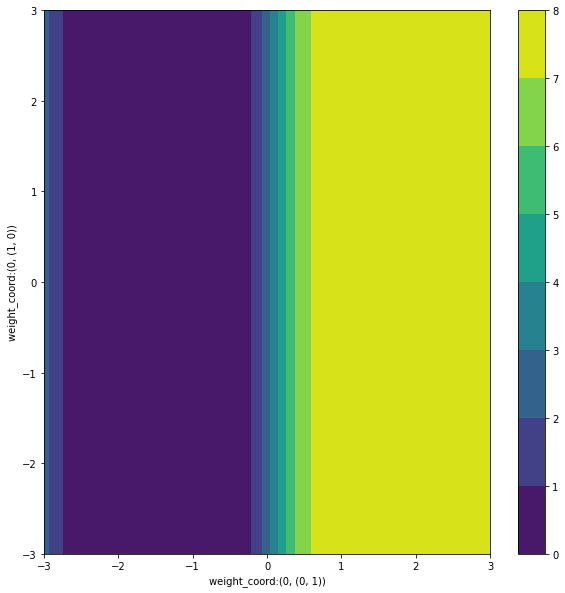

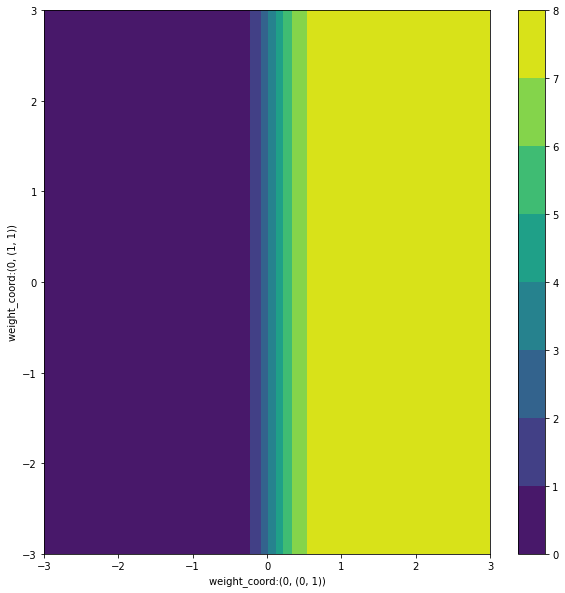

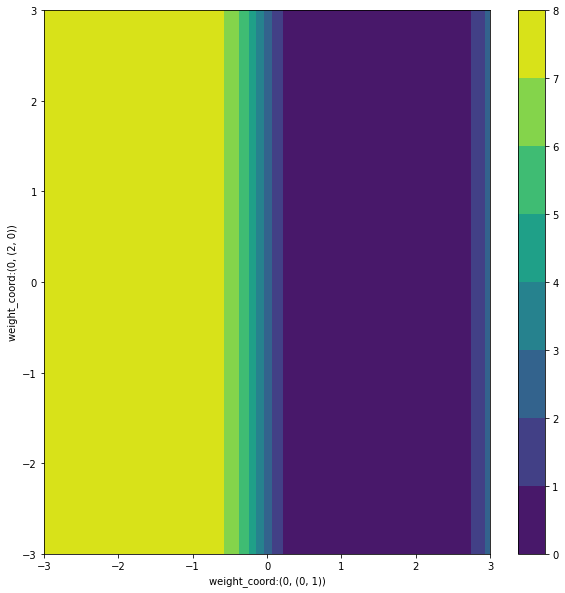

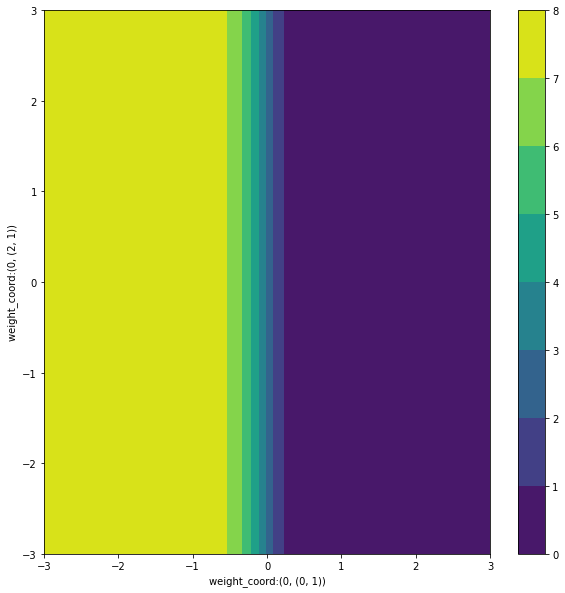

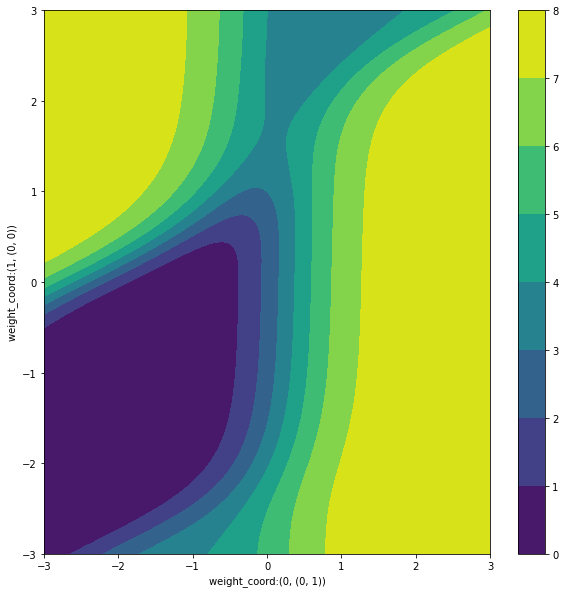

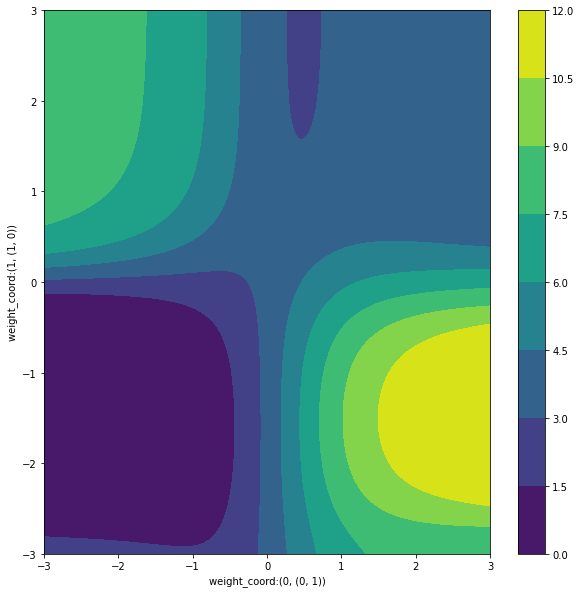

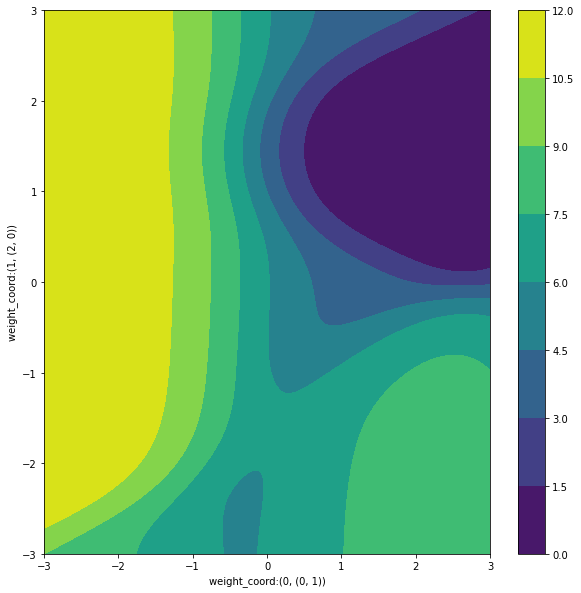

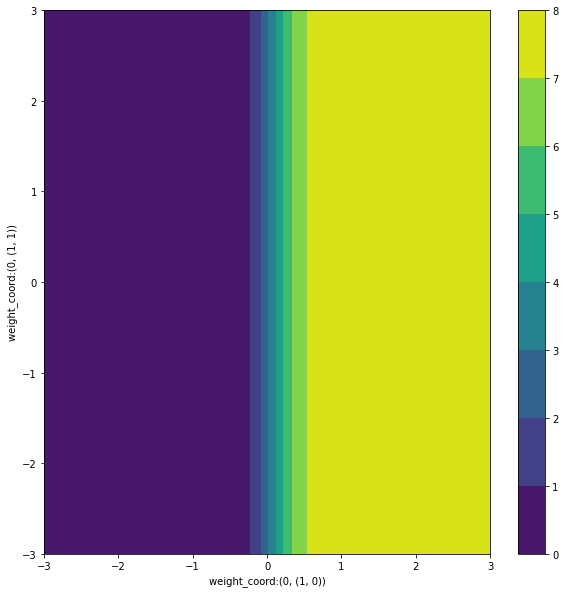

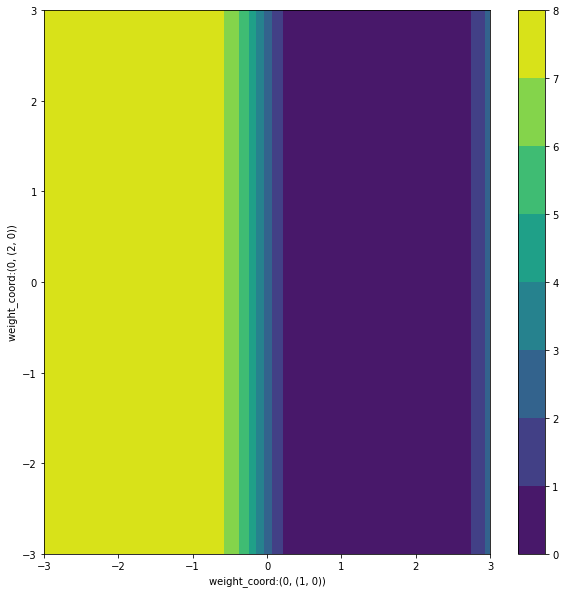

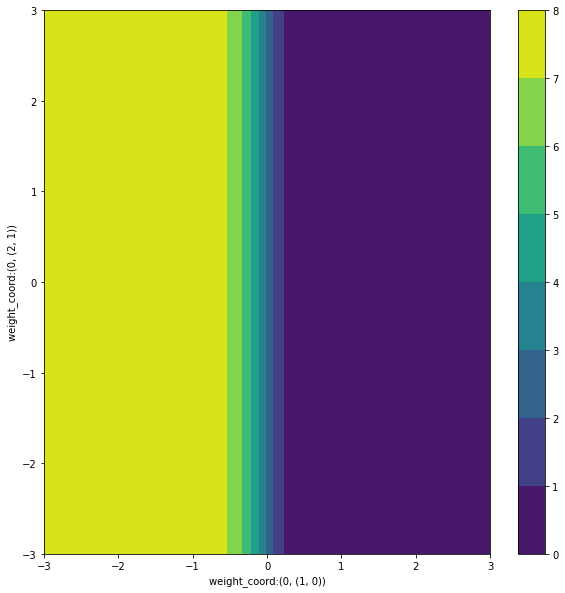

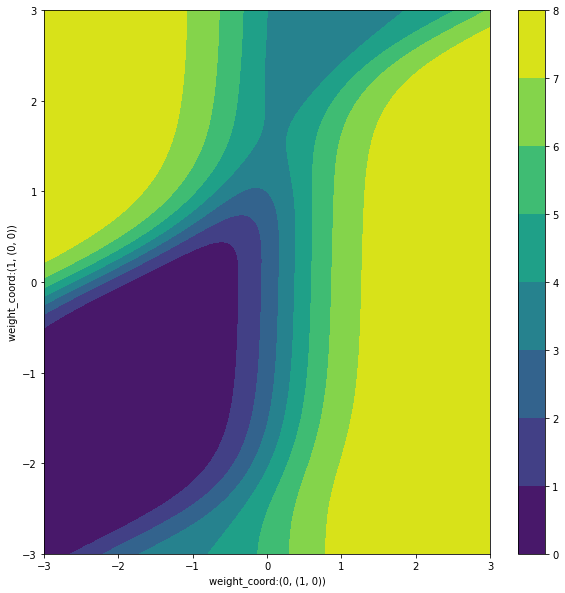

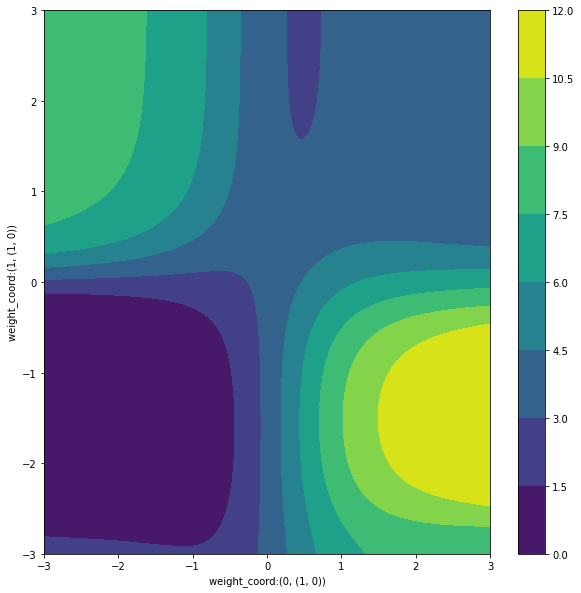

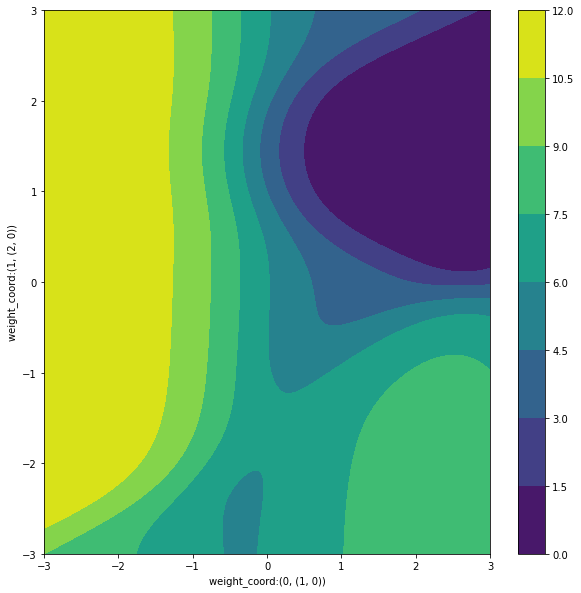

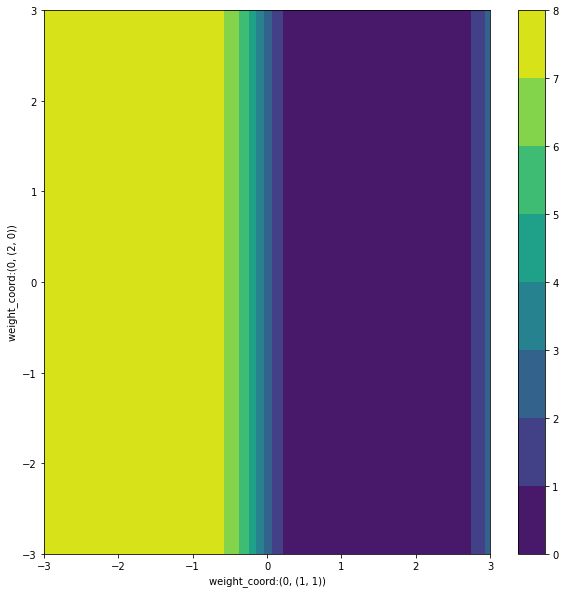

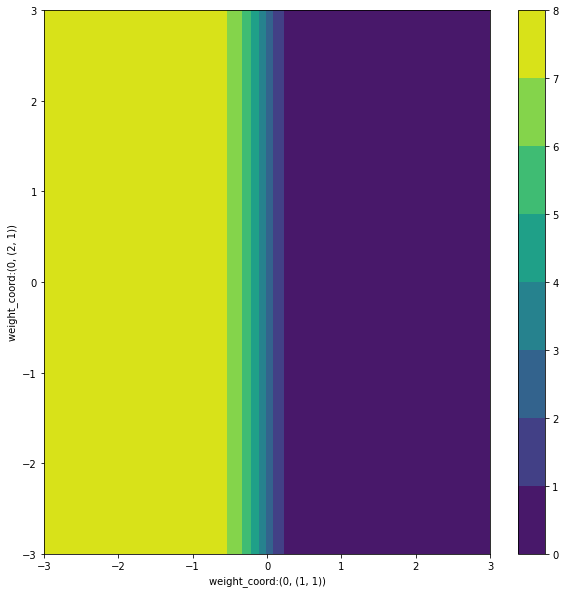

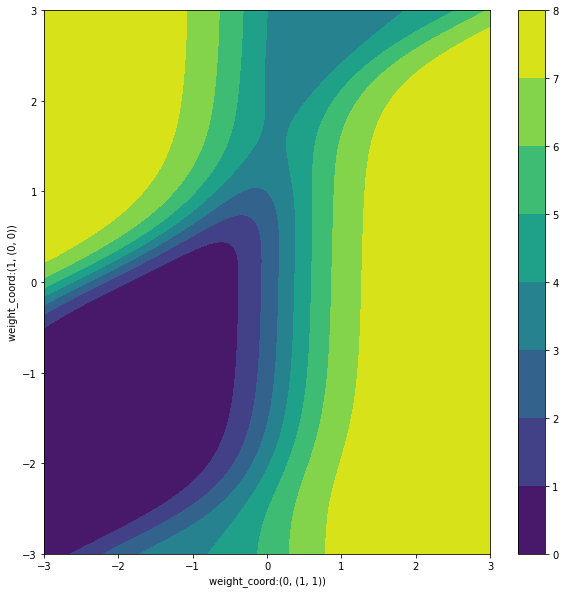

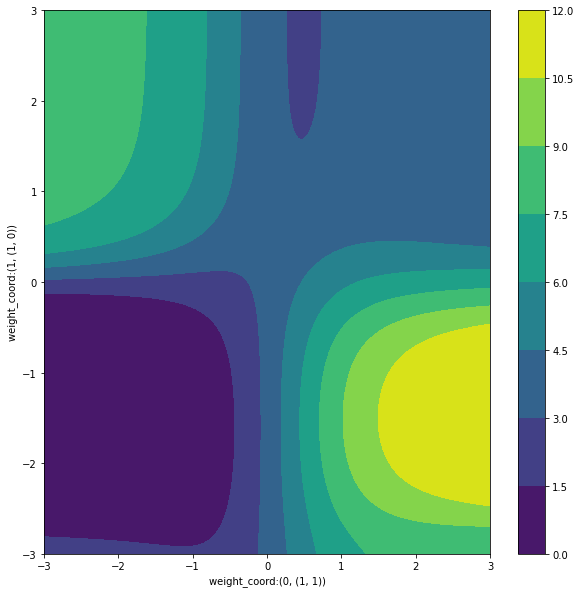

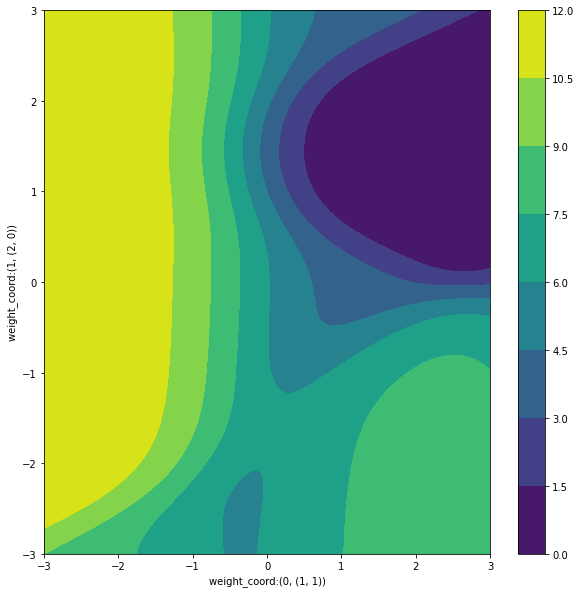

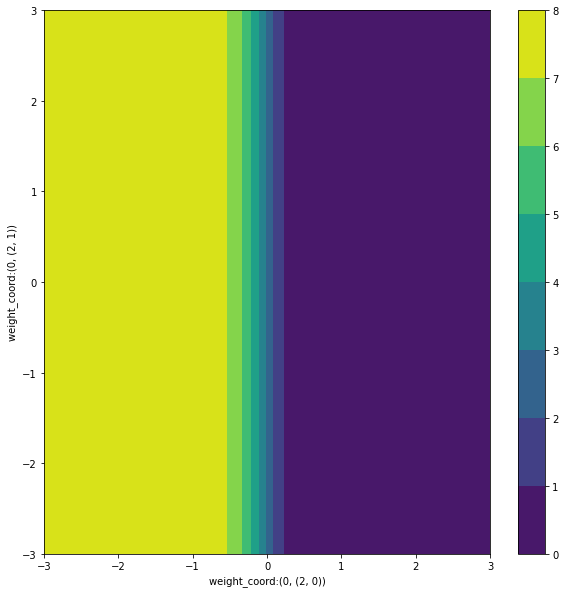

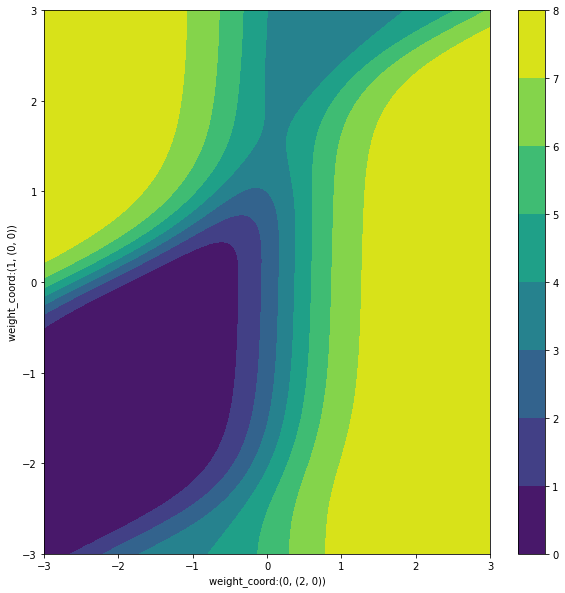

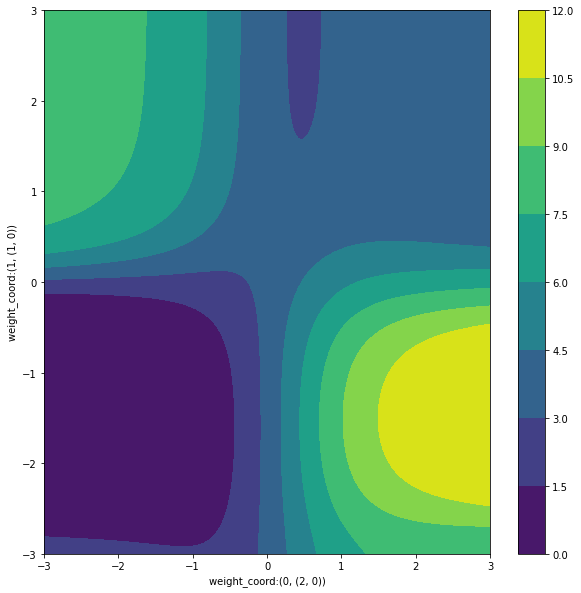

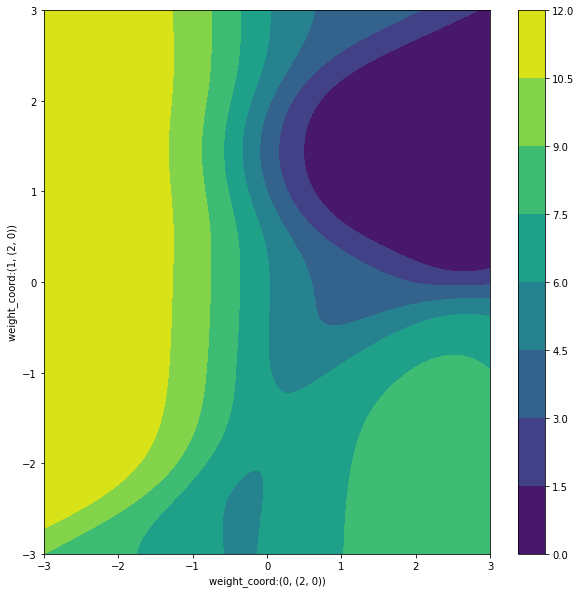

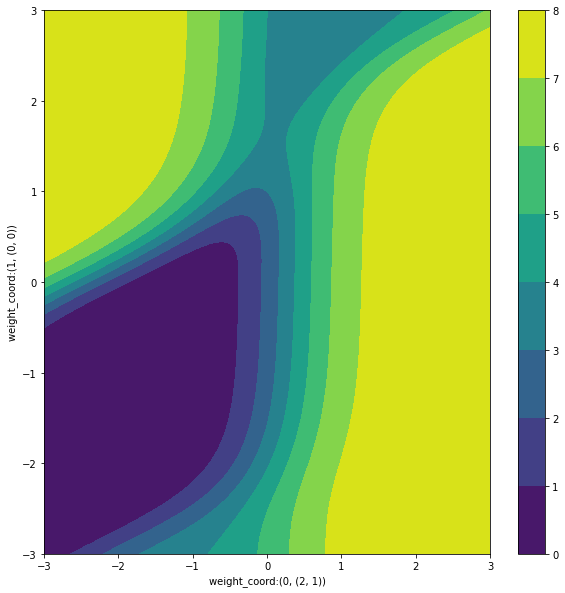

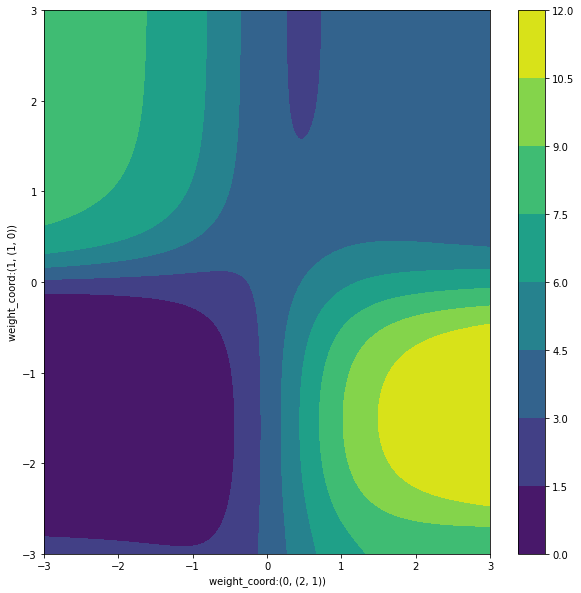

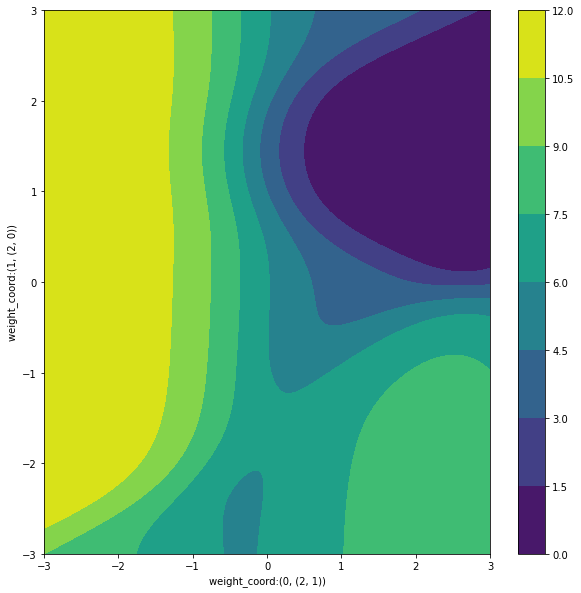

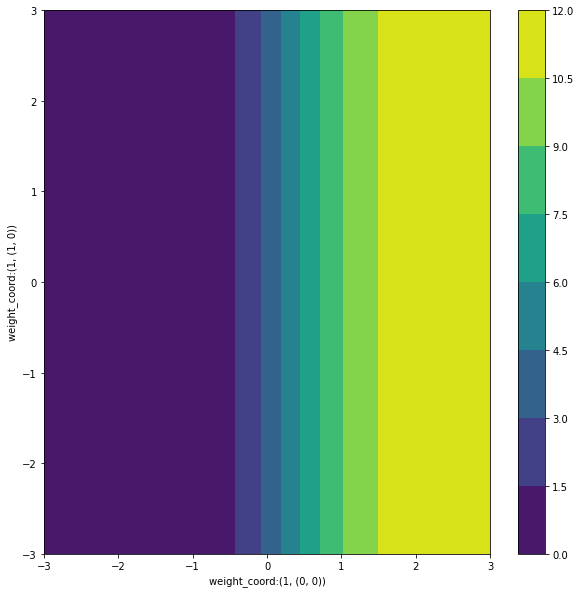

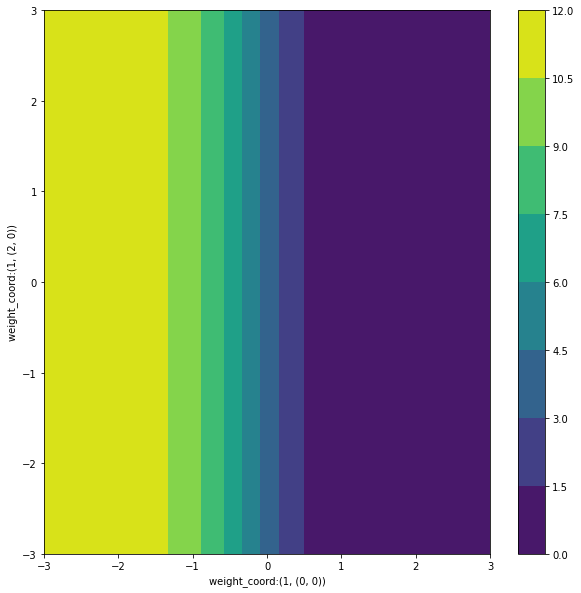

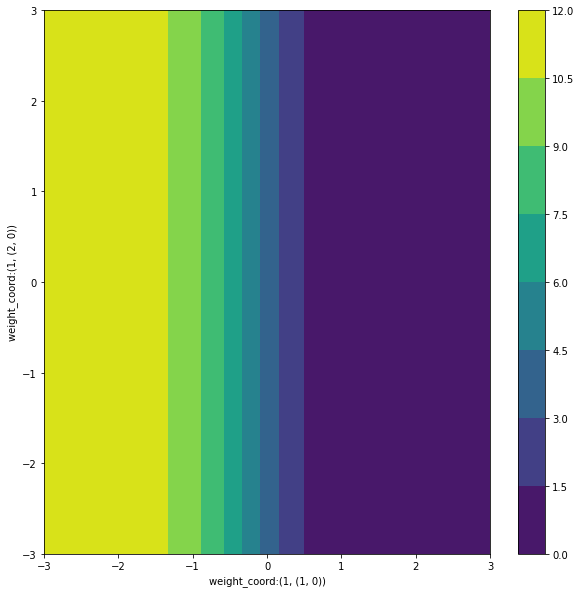

In [337]:
tp2Aux.plot_all_cuts(trainer_xor2,xor_gate_table)

In [338]:
trainer_xor2.best_weights

[array([[-1.26597936,  1.48839554],
        [-1.44907768, -1.62207335],
        [ 1.45334283,  1.62962818]]),
 array([[-2.11911226],
        [-2.42295123],
        [ 2.40738999]])]

### 3. d) Idem (c) pero computando el error para cada patrón de entrada por separado.